In [1]:
import pandas as pd
df = pd.read_csv("training.1600000.processed.noemoticon.csv", encoding = 'latin', header=None)

In [2]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
import seaborn as sns
sns.countplot(x="sentiment", data=df)

In [6]:
df['sentiment'] = df['sentiment'].replace(4,1)

In [7]:
df[['sentiment','text']].sample(10)

,sentiment,text
872403,1,@elisharene did you like the amount? I'm such ...
117748,0,Wanting to get out and cruise town and visit o...
632897,0,She has to go back second semester summer school
19352,0,Sometimes I just don't get it. I wish I got it.
1023471,1,searching through borders for books to buy...
1333432,1,@yarivs I'm sure you've already gotten flooded...
1528747,1,just laughing at the &quot;fantastic&quot; tra...
1354761,1,@BradMilner They have a Sims 3 app apparently
1438170,1,so the roomie and i have now decided we need t...
1537633,1,I broke a 1000 posts and didn't notice! Congra...


In [8]:
df['length'] = df['text'].apply(len)

In [ ]:
df['length'].plot(bins=100, kind='hist') 

In [10]:
df = df[['sentiment','text','length']]
df.describe()

,sentiment,length
count,1600000.0,1.600000e+06
mean,0.5,7.409011e+01
std,0.5,3.644114e+01
min,0.0,6.000000e+00
25%,0.0,4.400000e+01
50%,0.5,6.900000e+01
75%,1.0,1.040000e+02
max,1.0,3.740000e+02


In [14]:
sentences = df['text'].tolist()
sentences_string = " ".join(sentences)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

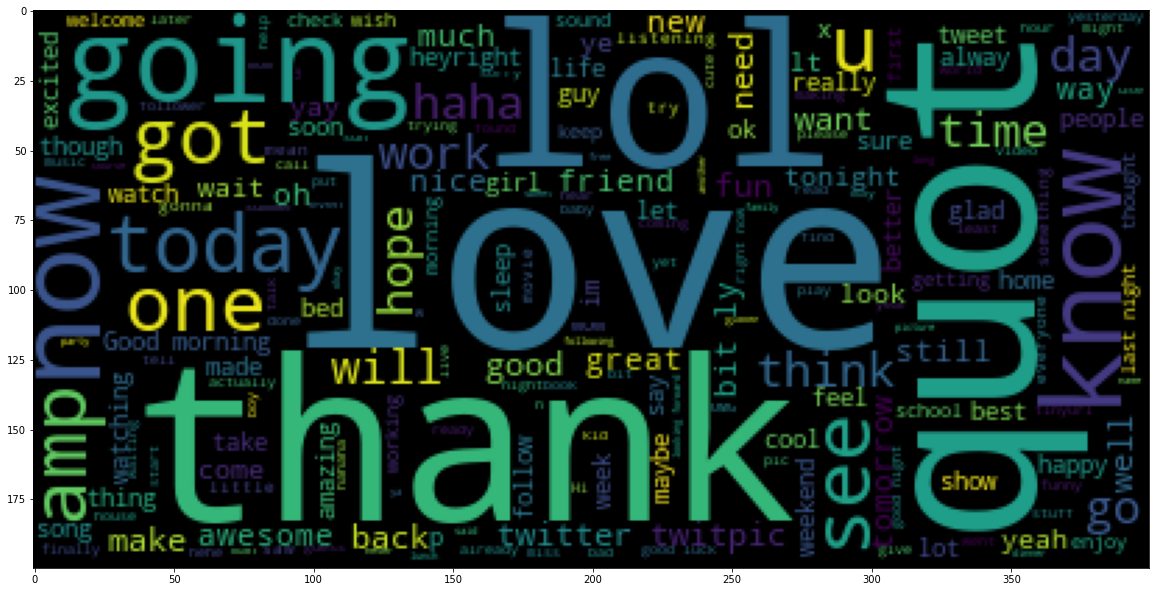

In [16]:
sentences = df[df['sentiment'] == 1]['text'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

In [ ]:
sentences = df[df['sentiment'] == 0]['text'].tolist()
sentences_string = " ".join(sentences)

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_string))

In [ ]:
import string
string.punctuation

In [ ]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
#stopwords.words('english')

In [20]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
#df_clean = df['text'].apply(message_cleaning)

In [ ]:
#print(df_clean[10])

In [ ]:
#print(df['text'][10])

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8')
df_countvectorizer = vectorizer.fit_transform(df['text'])

In [22]:
df_countvectorizer.shape

(1600000, 969103)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_countvectorizer, df['sentiment'],test_size = 0.25, random_state = 0)

In [24]:
X_train.shape

(1200000, 969103)

In [25]:
X_test.shape

(400000, 969103)

In [26]:
y_train.shape

(1200000,)

In [27]:
y_test.shape

(400000,)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict_test))

In [31]:
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train, y_train)

BernoulliNB(alpha=2, binarize=0.0, class_prior=None, fit_prior=True)

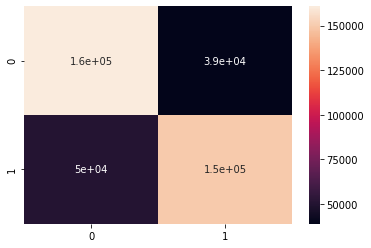

In [32]:
y_predict_test = BNBmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [33]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78    199734
           1       0.79      0.75      0.77    200266

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000



In [34]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C =2, max_iter=1000, n_jobs=1)
LRmodel.fit(X_train, y_train)

C:\Users\vkatz\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=1, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

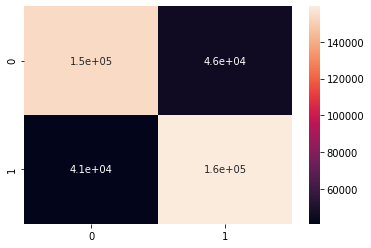

In [35]:
y_predict_test = LRmodel.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [36]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78    199734
           1       0.78      0.80      0.79    200266

    accuracy                           0.78    400000
   macro avg       0.78      0.78      0.78    400000
weighted avg       0.78      0.78      0.78    400000

